# 2017-2018 Girls Who Code final project example: movies on Facebook
By: Rucheng Diao, diaorch

This iPython notebook hosts the code for final project example for [Girls Who Code, DCMB UofM](http://umich.edu/~girlswc/) for school year 2017 - 2018.  

The [project data comes from Kaggle](https://www.kaggle.com/nazimamzz/imdb-dataset-of-5000-movie-posters/data). 

## Input data
This part is for import of Pandas and input data from a previously downloaded data set.  

In [1]:
import pandas as pd

In [2]:
movieData = pd.read_csv('../data/20170827-movie_stats-imdb_5000_movie_dataset_kaggle/movie stats - movie_metadata.csv')
# preview of first several lines of data
movieData.head()

,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
# checking what kinds of data there is in the table
print(movieData.columns)

Index(['movie_title', 'color', 'director_name', 'num_critic_for_reviews',
       'duration', 'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


In [4]:
# what are the range of title years of the movies
movieData['title_year'].describe()

count    4935.000000
mean     2002.470517
std        12.474599
min      1916.000000
25%      1999.000000
50%      2005.000000
75%      2011.000000
max      2016.000000
Name: title_year, dtype: float64

## Facebook likes vs title year
This part is plotting the number of Facebook likes vs the title years of the movies, colored by the number of voted IMDB users.  

In [5]:
import matplotlib.pyplot as plt
# iPython notebook setting: show figures inline
%matplotlib inline
# matplotlib setting: figure size
plt.rcParams['figure.figsize'] = (16, 6)

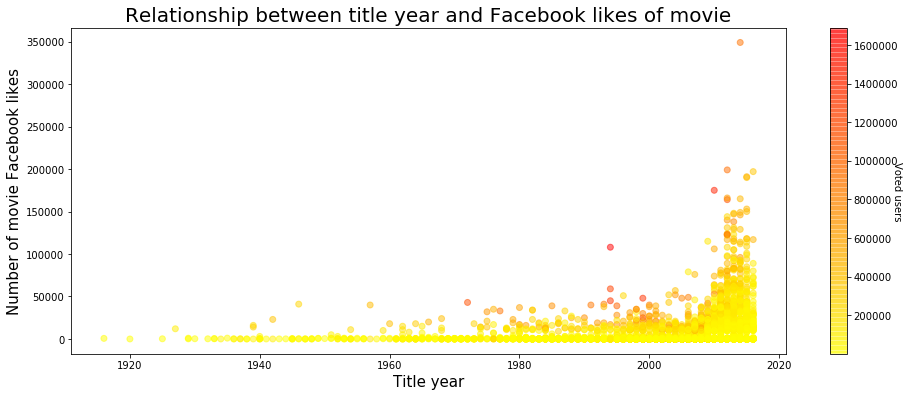

In [6]:
# values on x axis
x = movieData.title_year
# values on y axis
y = movieData.movie_facebook_likes
# values for color scale
c = movieData.num_voted_users
# plotting the scatter plot, using the x-s, y-s, and color values as set above
fig = plt.scatter(x, y, alpha = 0.5, c = c, cmap = "autumn_r")
# setting label for x-axis, including text and font size
plt.xlabel("Title year", fontsize = 15)
# setting label for y-axis, including text and font size
plt.ylabel("Number of movie Facebook likes", fontsize = 15)
# setting title for the whole figure, including text and font size
plt.title("Relationship between title year and Facebook likes of movie", fontsize = 20)
# setting title for color bar
plt.colorbar(fig).set_label('Voted users', rotation = 270)

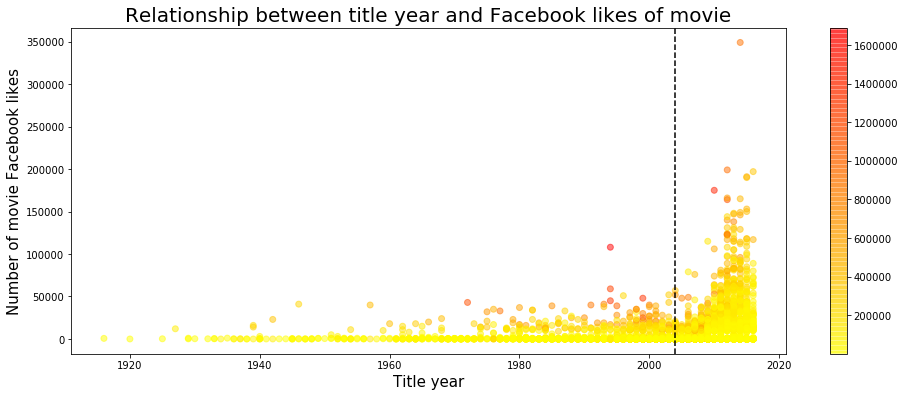

In [7]:
x = movieData.title_year
y = movieData.movie_facebook_likes
c = movieData.num_voted_users
fig = plt.scatter(x, y, alpha = 0.5, c = c, cmap = "autumn_r")

# adding a vertical line for year 2004
plt.axvline(x = 2004, color = 'k', linestyle = '--')

plt.xlabel("Title year", fontsize = 15)
plt.ylabel("Number of movie Facebook likes", fontsize = 15)
plt.title("Relationship between title year and Facebook likes of movie", fontsize = 20)
plt.colorbar(fig)

## What are the best liked movies pre- and post-Facebook?

We noticed that there are two dots in the figure above that has a very high Facebook likes, one of which is before Face book came around, and the other one after. We might want to find out what the movies are.

In [9]:
# How to find the dot that has over 250000 likes and is post Facebook?
# Why do we need only one of the criteria?
# finding movie that has over 250000 likes
findDot_post = movieData[(movieData.movie_facebook_likes > 250000)]
print(findDot_post.to_string())

     movie_title  color      director_name  num_critic_for_reviews  duration  director_facebook_likes  actor_3_facebook_likes   actor_2_name  actor_1_facebook_likes        gross                  genres         actor_1_name  num_voted_users  cast_total_facebook_likes   actor_3_name  facenumber_in_poster                                      plot_keywords                                    movie_imdb_link  num_user_for_reviews language country content_rating       budget  title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes
96  Interstellar  Color  Christopher Nolan                   712.0     169.0                  22000.0                  6000.0  Anne Hathaway                 11000.0  187991439.0  Adventure|Drama|Sci-Fi  Matthew McConaughey           928227                      31488  Mackenzie Foy                   1.0  black hole|father daughter relationship|saving...  http://www.imdb.com/title/tt0816692/?ref_=fn_t...                2725.0  English     US

In [10]:
# How to find the dot that has over 100000 likes and is pre Facebook?
# Why do we need both criteria this time?
# finding movie that has over 100000 likes AND the title year is before 2000
findDot_pre = movieData[(movieData.movie_facebook_likes > 100000) & (movieData.title_year < 2000)]
print(findDot_pre.to_string())

                   movie_title  color   director_name  num_critic_for_reviews  duration  director_facebook_likes  actor_3_facebook_likes    actor_2_name  actor_1_facebook_likes       gross       genres    actor_1_name  num_voted_users  cast_total_facebook_likes actor_3_name  facenumber_in_poster                                      plot_keywords                                    movie_imdb_link  num_user_for_reviews language country content_rating      budget  title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes
1937  The Shawshank Redemption  Color  Frank Darabont                   199.0     142.0                      0.0                   461.0  Jeffrey DeMunn                 11000.0  28341469.0  Crime|Drama  Morgan Freeman          1689764                      13495   Bob Gunton                   0.0  escape from prison|first person narration|pris...  http://www.imdb.com/title/tt0111161/?ref_=fn_t...                4144.0  English     USA              

We are also curious which is the earlies movie that has a non-zero Facebook like:  

In [11]:
findDot_first = movieData[(movieData.movie_facebook_likes > 0) & (movieData.title_year <=1925)]
print(findDot_first.to_string())

                                           movie_title             color  director_name  num_critic_for_reviews  duration  director_facebook_likes  actor_3_facebook_likes    actor_2_name  actor_1_facebook_likes  gross             genres  actor_1_name  num_voted_users  cast_total_facebook_likes  actor_3_name  facenumber_in_poster                                      plot_keywords                                    movie_imdb_link  num_user_for_reviews language country content_rating    budget  title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes
4810  Intolerance: Love's Struggle Throughout the Ages   Black and White  D.W. Griffith                    69.0     123.0                    204.0                     9.0       Mae Marsh                   436.0    NaN  Drama|History|War  Lillian Gish            10718                        481   Walter Long                   1.0    huguenot|intolerance|medicis|protestant|wedding  http://www.imdb.com/title/tt0006864/

## What does the distribution of Facebook likes of movies look like?
The histogram of movie Facebook likes is plotted below. And the summary statistics are printed too. It is also found that a lot of movies have 0 Facebook likes, according to the shape of movie data table and the movie data table of non-zero Facebook likes.  

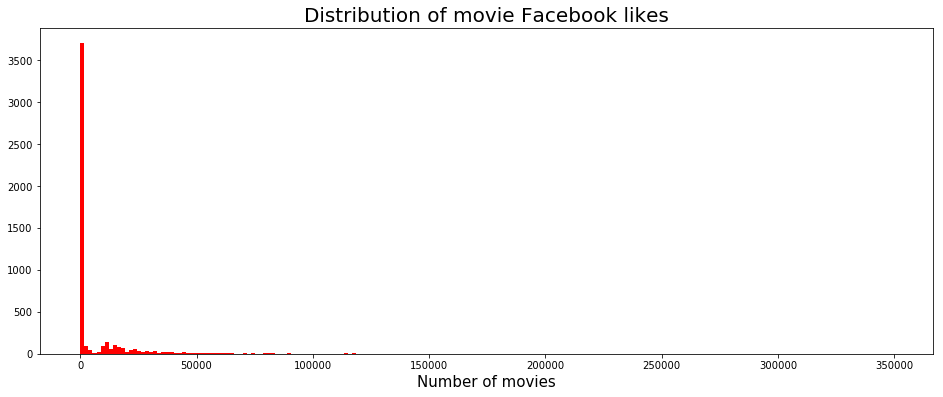

In [12]:
# plotting histogram of Facebook likes of movies
plt.hist(movieData.movie_facebook_likes, bins = 200, color = 'r')
plt.xlabel("Movie Facebook likes", fontsize = 15)
plt.xlabel("Number of movies", fontsize = 15)
plt.title("Distribution of movie Facebook likes", fontsize = 20)

In [13]:
# checking the summary statistics of Facebook likes for movies
movieData['movie_facebook_likes'].describe()

count      5043.000000
mean       7525.964505
std       19320.445110
min           0.000000
25%           0.000000
50%         166.000000
75%        3000.000000
max      349000.000000
Name: movie_facebook_likes, dtype: float64

In [14]:
movieData.shape

(5043, 28)

In [15]:
# another way to check the summary statistics individually is to use funcions in Numpy
import numpy as np

In [16]:
# checking the median value of movie Facebook likes
movieFacebookLikesMedian = np.median(movieData['movie_facebook_likes'])
print(movieFacebookLikesMedian)

166.0


In [17]:
# subsetting data set, keeping only entries that have non-zero Facebook likes
movieDataNonzero = movieData.loc[movieData.movie_facebook_likes !=  0]
# checking the dimension/shape of the subset data
movieDataNonzero.shape

(2862, 28)

## Is there a relationship between movie Facebook likes and the gross income the movie make?

Here the relationship between movie Facebook likes and the gross that the movie made is explored. 

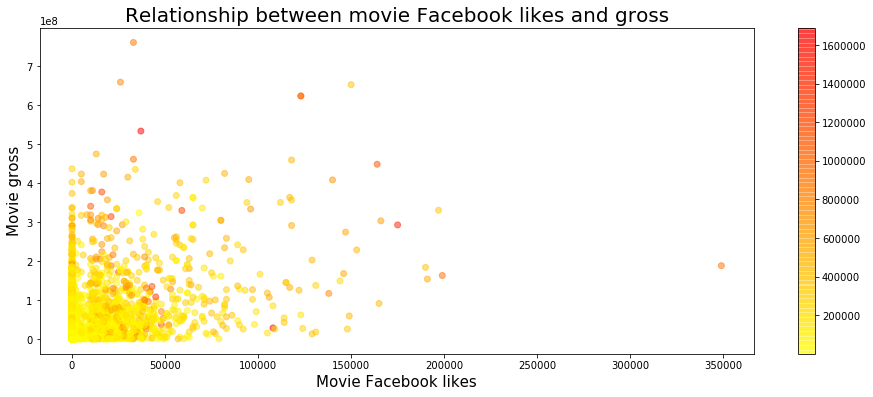

In [18]:
x = movieData.movie_facebook_likes
y = movieData.gross
c = movieData.num_voted_users
fig = plt.scatter(x, y, alpha = 0.5, c = c, cmap = "autumn_r")
plt.xlabel("Movie Facebook likes", fontsize = 15)
plt.ylabel("Movie gross", fontsize = 15)
plt.title("Relationship between movie Facebook likes and gross", fontsize = 20)
plt.colorbar(fig)

**But**, is it reasonable to assume that 7 million dollars made in 1990 is the same as 7 million dollars made in 2010?

Advance content:  

In [19]:
# new data input: CPI Urban from 1913 to 2016
cpi = {1913:9.9, 1914:10, 1915:10.1, 1916:10.9, 1917:12.8, 1918:15.1, 1919:17.3, 1920:20, 1921:17.9, 1922:16.8, 1923:17.1, 1924:17.1, 1925:17.5, 1926:17.7, 1927:17.4, 1928:17.1, 1929:17.1, 1930:16.7, 1931:15.2, 1932:13.7, 1933:13, 1934:13.4, 1935:13.7, 1936:13.9, 1937:14.4, 1938:14.1, 1939:13.9, 1940:14, 1941:14.7, 1942:16.3, 1943:17.3, 1944:17.6, 1945:18, 1946:19.5, 1947:22.3, 1948:24.1, 1949:23.8, 1950:24.1, 1951:26, 1952:26.5, 1953:26.7, 1954:26.9, 1955:26.8, 1956:27.2, 1957:28.1, 1958:28.9, 1959:29.1, 1960:29.6, 1961:29.9, 1962:30.2, 1963:30.6, 1964:31, 1965:31.5, 1966:32.4, 1967:33.4, 1968:34.8, 1969:36.7, 1970:38.8, 1971:40.5, 1972:41.8, 1973:44.4, 1974:49.3, 1975:53.8, 1976:56.9, 1977:60.6, 1978:65.2, 1979:72.6, 1980:82.4, 1981:90.9, 1982:96.5, 1983:99.6, 1984:103.9, 1985:107.6, 1986:109.6, 1987:113.6, 1988:118.3, 1989:124, 1990:130.7, 1991:136.2, 1992:140.3, 1993:144.5, 1994:148.2, 1995:152.4, 1996:156.9, 1997:160.5, 1998:163, 1999:166.6, 2000:172.2, 2001:177.1, 2002:179.9, 2003:184, 2004:188.9, 2005:195.3, 2006:201.6, 2007:207.3, 2008:215.303, 2009:214.537, 2010:218.056, 2011:224.939, 2012:229.594, 2013:232.957, 2014:236.736, 2015:237.017, 2016:240.007}

In [20]:
# normalizing the gross income using CPI data
import math
movie_gross_normalized = []
for i in range(0, len(movieData)):
    one_movie_year = movieData['title_year'].iloc[i]
    # there are NaN-s in title year information
    if (math.isnan(one_movie_year)):
        one_movie_gross_normalized = np.NaN
    else:
        # using the dictionary of data to get the CPI data of the title year
        movie_cpi = cpi[one_movie_year]
        # normalizing the gross income of movie using the CPI of the year
        one_movie_gross_normalized = movieData['gross'].iloc[i] / movie_cpi
    # adding the calculated normalization result to the recording list
    movie_gross_normalized.append(one_movie_gross_normalized)
    

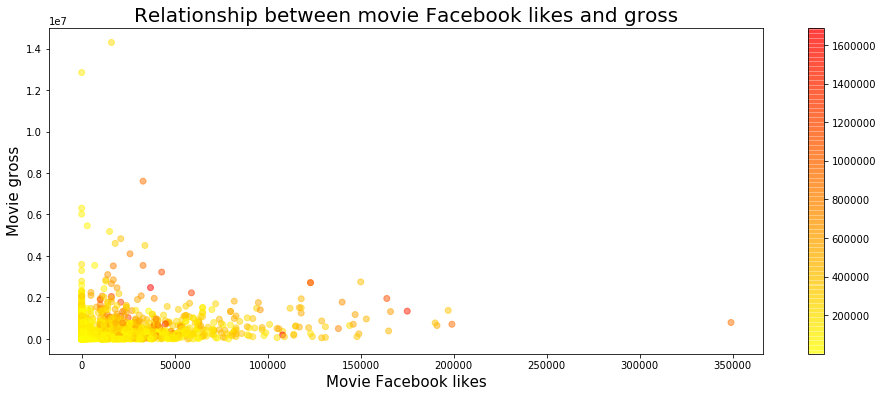

In [21]:
x = movieData.movie_facebook_likes
y = movie_gross_normalized
c = movieData.num_voted_users
fig = plt.scatter(x, y, alpha = 0.5, c = c, cmap = "autumn_r")
plt.xlabel("Movie Facebook likes", fontsize = 15)
plt.ylabel("Movie gross", fontsize = 15)
plt.title("Relationship between movie Facebook likes and gross", fontsize = 20)
plt.colorbar(fig)

## Is a one-face poster the key to success for a movie?

Hypothesis: movies with posters with only one face on it are more successful, speaking of gross income.  
Explore the data to find out if it is true.  

In [22]:
# importing a plotting package called seaborn
import seaborn as sns
# reseting the graph size
plt.rcParams['figure.figsize'] = (16, 6)

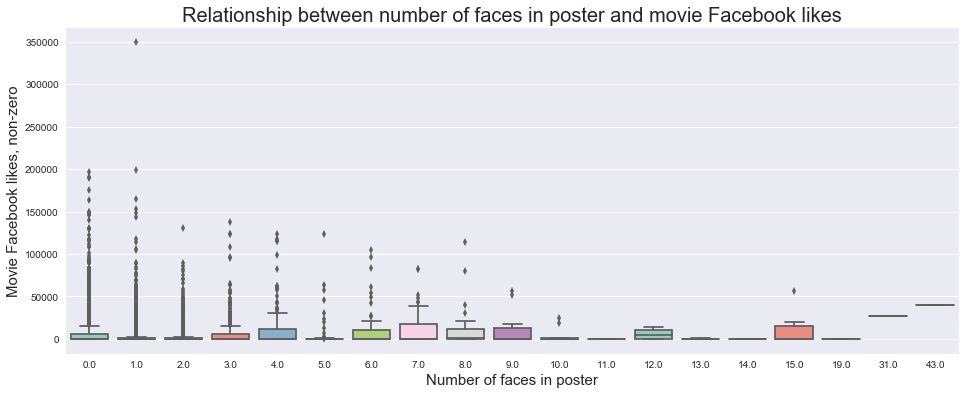

In [23]:
# using seaborn to plot a box plot
sns.boxplot(data = movieData, x = 'facenumber_in_poster', y = 'movie_facebook_likes', palette = 'Set3')
# setting label for x-axis
plt.xlabel("Number of faces in poster", fontsize = 15)
# setting label for y-axis
plt.ylabel("Movie Facebook likes, non-zero", fontsize = 15)
# setting title for the whole figure
plt.title("Relationship between number of faces in poster and movie Facebook likes", fontsize = 20)

We can't really see anything because the boxes are "squished" to the bottom. Why so?  
That is possibly because almost half of the movies have 0 likes, from what we have discovered above.  
So let's try again removing movies with 0 likes.  

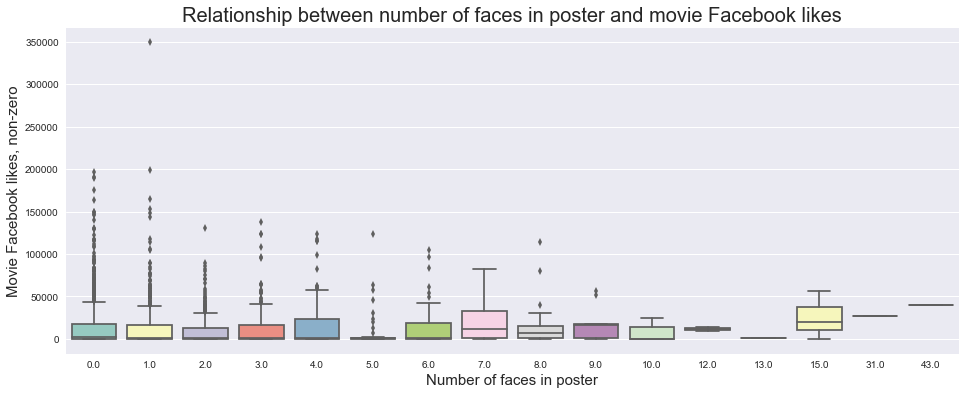

In [24]:
# using seaborn to plot a box plot
sns.boxplot(data = movieDataNonzero, x = 'facenumber_in_poster', y = 'movie_facebook_likes', palette = 'Set3')
# setting label for x-axis
plt.xlabel("Number of faces in poster", fontsize = 15)
# setting label for y-axis
plt.ylabel("Movie Facebook likes, non-zero", fontsize = 15)
# setting title for the whole figure
plt.title("Relationship between number of faces in poster and movie Facebook likes", fontsize = 20)

In [25]:
# counting the appearance of each possible value 
facenumber_freq = movieDataNonzero.facenumber_in_poster.value_counts()
print(facenumber_freq)

0.0     1233
1.0      678
2.0      403
3.0      237
4.0      128
5.0       46
6.0       45
7.0       31
8.0       26
9.0        9
10.0       6
15.0       3
12.0       2
43.0       1
13.0       1
31.0       1
Name: facenumber_in_poster, dtype: int64


In [26]:
# finding the index - possible values - from the frequency table above
facenumber_index = facenumber_freq.index

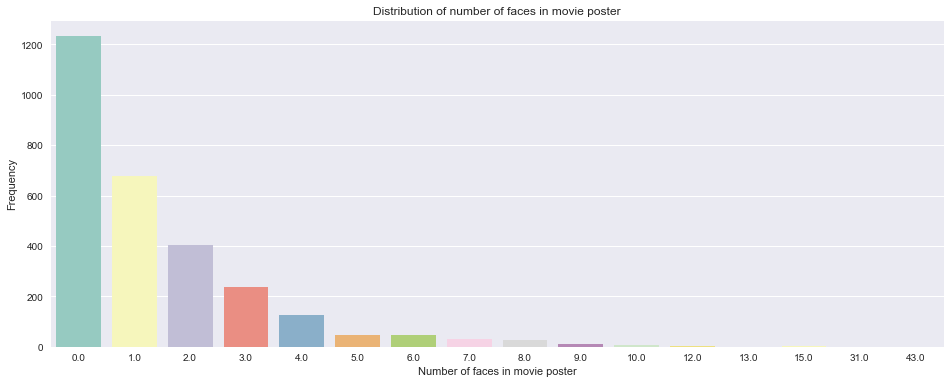

In [27]:
# plotting a bar plot using seaborn
sns.barplot(x = facenumber_index, y = facenumber_freq, palette = 'Set3')
plt.xlabel("Number of faces in movie poster")
plt.ylabel("Frequency")
plt.title("Distribution of number of faces in movie poster")

**Qustion**: are all the 0s in the numbers of faces in poster really mean the there are no faces in the poster? Or there are missing data in the numbers?  
**More quesion**: what are some of the possible strategies make your movie popular by setting the number of faces in the poster?  

# Conclusion

In exploration of the IMDB 5000 movie data set, we found that:

 + We found at trend that the newer movies tend to have more likes on Facebook.
 + "Interstellar" and "The Shawshank Redemption" are the most liked movies on Facebook, post- and pre-Facebook.
 + "Intolerance: Love's Struggle Throughout the Ages" is the first movie we know that has a non-zero Facebook likes.
 + There is not a obvious relationship between the gross income and how many likes a movie gets on Facebook.
 + There are multiple strategies to design a poster regarding to how many faces are on it, if you want to get more Facebook likes.  